In [ ]:
import numpy as np

# Constantes del sistema
G = 1.0  # Constante de gravitación universal (reescalada)
c = 1.496e11  # Unidad de distancia (m), distancia Tierra-Sol
Ms = 1.0  # Masa del Sol (reescalada)
Mm = 1.65e-7  # Masa de Mercurio (reescalada)
Mv = 2.45e-6  # Masa de Venus (reescalada)
Mt = 3.0e-6  # Masa de Tierra (reescalada)
Mm = 3.2e-7  # Masa de Marte (reescalada)
Mj = 9.5e-4  # Masa de Júpiter (reescalada)
Msat = 2.86e-4  # Masa de Saturno (reescalada)
Mu = 4.4e-5  # Masa de Urano (reescalada)
Mn = 5.15e-5  # Masa de Neptuno (reescalada)
dt = 0.2  # Paso temporal (reescalado)
num_steps = 1000 # Número de pasos de simulación

# Datos iniciales de los planetas (posición y velocidad inicial reescaladas)
# Formato: [x, y, vx, vy, masa]
"""planetas = {
    "Sol": [0.0 * 2.5, 0.0, 0.0, 0.0, 1.0],
    "Mercurio": [0.78 * 2.5, 0.0, 0.0, 0, 1.65e-7],
    "Venus": [1.44 * 2.5, 0.0, 0.0, 0, 2.45e-6],
    "Tierra": [2 * 2.5, 0.0, 0.0, 0, 3.0e-6],
    "Marte": [3.04 * 2.5, 0.0, 0.0, 0, 3.2e-7],
    "Júpiter": [10.4 * 2.5, 0.0, 0.0, 0, 9.5e-4], 
    "Saturno": [19.16 * 2.5, 0.0, 0.0, 0, 2.86e-4],
    "Urano": [38.4 * 2.5, 0.0, 0.0, 0, 4.4e-5],
    "Neptuno": [60.1*2.5, 0.0, 0.0, 0, 5.15e-5],  
}
"""
planetas = {
    "Sol": [0.0 , 0.0, 0.0, 0.0, Ms],
    "Mercurio": [2, 0.0, 0.0, 0, Mm],
    "Venus": [3, 0.0, 0.0, 0, Mv],
    "Tierra": [4, 0.0, 0.0, 0, Mt],
    "Marte": [5, 0.0, 0.0, 0, Mm],
    "Júpiter": [6, 0.0, 0.0, 0, Mj], 
    "Saturno": [7, 0.0, 0.0, 0, Msat],
    "Urano": [8, 0.0, 0.0, 0, Mu],
    "Neptuno": [9, 0.0, 0.0, 0, Mn],  
}


# Inicialización de velocidades para los planetas (excepto el Sol)
for p, data in planetas.items():
    if p != "Sol":
        x, y = data[0], data[1]
        r = np.sqrt(x**2 + y**2)
        data[2] = 0.0  # vx = 0
        data[3] = np.sqrt(G * Ms / r)  # vy = sqrt(GM/r)

# Inicialización de velocidades para las lunas 
for p, data in planetas.items():
    if p != "Sol":
        x, y = data[0], data[1]
        r = np.sqrt(x**2 + y**2)
        data[2] = 0.0  # vx = 0
        data[3] = np.sqrt(G * Mj / r)  # vy = sqrt(GM/r)

# Imprimir datos iniciales de los planetas
def imprimir_datos_planetas(planetas):
    """
    Imprime por pantalla los datos iniciales de cada planeta: 
    posición (x, y), velocidad (vx, vy) y masa.
    """
    for nombre, datos in planetas.items():
        x, y, vx, vy, masa = datos
        print(f"Planeta: {nombre}")
        print(f"  Posición (x, y): ({x}, {y})")
        print(f"  Velocidad (vx, vy): ({vx}, {vy})")
        print(f"  Masa: {masa}\n")

imprimir_datos_planetas(planetas)

# Inicialización de arrays para almacenar posiciones y velocidades
posiciones = {planeta: [] for planeta in planetas}


# Función para calcular la aceleración gravitacional
def calcular_aceleracion(posiciones, masas):
    aceleraciones = {}
    for planeta1, (x1, y1) in posiciones.items():
        ax, ay = 0.0, 0.0
        for planeta2, (x2, y2) in posiciones.items():
            if planeta1 != planeta2:
                dx = x2 - x1
                dy = y2 - y1
                r = np.sqrt(dx**2 + dy**2)
                fuerza = G * masas[planeta2] / r**3
                ax += fuerza * dx
                ay += fuerza * dy
        aceleraciones[planeta1] = (ax, ay)
    return aceleraciones

# Inicialización de posiciones, velocidades y masas
pos_actual = {p: np.array([data[0], data[1]]) for p, data in planetas.items()}
vel_actual = {p: np.array([data[2], data[3]]) for p, data in planetas.items()}
masas = {p: data[4] for p, data in planetas.items()}

# Primer paso de Verlet (posición inicial y aceleración inicial)
aceleracion_actual = calcular_aceleracion(pos_actual, masas)

# Simulación con Verlet en velocidad
for step in range(num_steps):
    # Actualizar posiciones
    for planeta in planetas:
        pos_actual[planeta] += vel_actual[planeta] * dt + 0.5 * np.array(aceleracion_actual[planeta]) * dt**2

    # Calcular nuevas aceleraciones
    nueva_aceleracion = calcular_aceleracion(pos_actual, masas)

    # Actualizar velocidades
    for planeta in planetas:
        vel_actual[planeta] += 0.5 * (np.array(aceleracion_actual[planeta]) + np.array(nueva_aceleracion[planeta])) * dt

    # Guardar posiciones actuales
    for planeta in planetas:
        posiciones[planeta].append(pos_actual[planeta].tolist())

    # Actualizar aceleraciones
    aceleracion_actual = nueva_aceleracion

# Guardar resultados en un archivo .dat con el formato que la animación espera
with open(r"D:/DOCUMENTOS/GRANADA/4/COMPU/FisiComp/planets_data.dat", "w") as f:
    for step in range(num_steps):
        # Un bloque (fotograma) por step => 1 línea por planeta
        for planeta in planetas:
            x, y = posiciones[planeta][step]
            # Escribe x,y separados por COMA
            f.write(f"{x},{y}\n")
        # Deja una línea en blanco para separar fotogramas
        f.write("\n")

print("Simulación completada. Las posiciones se han guardado en 'planets_data.dat'.")

Planeta: Sol
  Posición (x, y): (0.0, 0.0)
  Velocidad (vx, vy): (0.0, 0.0)
  Masa: 1.0

Planeta: Mercurio
  Posición (x, y): (2, 0.0)
  Velocidad (vx, vy): (0.0, 0.021794494717703367)
  Masa: 3.2e-07

Planeta: Venus
  Posición (x, y): (3, 0.0)
  Velocidad (vx, vy): (0.0, 0.017795130420052183)
  Masa: 2.45e-06

Planeta: Tierra
  Posición (x, y): (4, 0.0)
  Velocidad (vx, vy): (0.0, 0.015411035007422441)
  Masa: 3e-06

Planeta: Marte
  Posición (x, y): (5, 0.0)
  Velocidad (vx, vy): (0.0, 0.013784048752090222)
  Masa: 3.2e-07

Planeta: Júpiter
  Posición (x, y): (6, 0.0)
  Velocidad (vx, vy): (0.0, 0.012583057392117916)
  Masa: 0.00095

Planeta: Saturno
  Posición (x, y): (7, 0.0)
  Velocidad (vx, vy): (0.0, 0.011649647450214351)
  Masa: 0.000286

Planeta: Urano
  Posición (x, y): (8, 0.0)
  Velocidad (vx, vy): (0.0, 0.010897247358851683)
  Masa: 4.4e-05

Planeta: Neptuno
  Posición (x, y): (9, 0.0)
  Velocidad (vx, vy): (0.0, 0.010274023338281627)
  Masa: 5.15e-05

Simulación completad

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


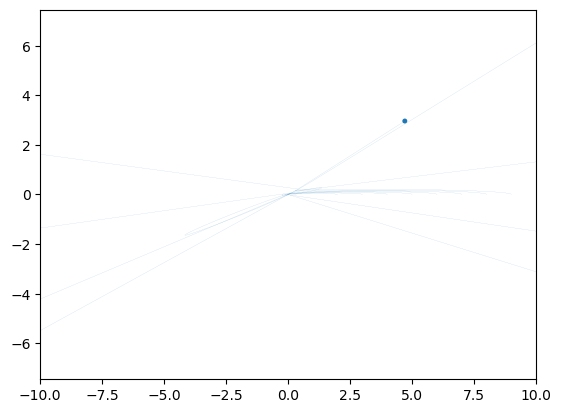

In [2]:
# ================================================================================
# ANIMACION SISTEMA SOLAR
#
# Genera una animación a partir de un fichero de datos con las posiciones
# de los planetas en diferentes instantes de tiempo.
# 
# El fichero debe estructurarse de la siguiente forma:
# 
#   x1_1, y1_1
#   x2_1, y2_1
#   x3_1, y3_1
#   (...)
#   xN_1, yN_1
#   
#   x1_2, y1_2
#   x2_2, y2_2
#   x3_2, y3_2
#   (...)
#   xN_2, yN_2
#
#   x1_3, y1_3
#   x2_3, y2_3
#   x3_3, y3_3
#   (...)
#   xN_3, yN_3
#   
#   (...)
#
# donde xi_j es la componente x del planeta i-ésimo en el instante de
# tiempo j-ésimo, e yi_j lo mismo en la componente y. El programa asume que
# el nº de planetas es siempre el mismo.
# ¡OJO! Los datos están separados por comas.
# 
# Si solo se especifica un instante de tiempo, se genera una imagen en pdf
# en lugar de una animación
#
# Se puede configurar la animación cambiando el valor de las variables
# de la sección "Parámetros"
#
# ================================================================================

# Importa los módulos necesarios
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

# Parámetros
# ========================================
file_in = "D:/DOCUMENTOS/GRANADA/4/COMPU/FisiComp/planets_data.dat" # Nombre del fichero de datos
file_out = "D:/DOCUMENTOS/GRANADA/4/COMPU/FisiComp/planetas" # Nombre del fichero de salida (sin extensión)

# Límites de los ejes X e Y
x_min = -10
x_max = 10
y_min = -10
y_max = 10

interval = 50 # Tiempo entre fotogramas en milisegundos
show_trail = True # Muestra la "estela" del planeta
trail_width = 0.05 # Ancho de la estela
save_to_file = True # False: muestra la animación por pantalla,
                     # True: la guarda en un fichero
dpi = 300 # Calidad del vídeo de salida (dots per inch)

# Radio del planeta, en las mismas unidades que la posición
# Puede ser un número (el radio de todos los planetas) o una lista con
# el radio de cada uno
planet_radius = 0.1

"""planet_radius = [
    1.5,    # Sol (fijo)
    0.3793, # Mercurio
    0.3856, # Venus
    0.3862, # Tierra
    0.3810, # Marte
    0.5,    # Júpiter (fijo)
    0.4803, # Saturno
    0.4197, # Urano
    0.4184, # Neptuno
]
"""


# Lectura del fichero de datos
# ========================================
# Lee el fichero a una cadena de texto
with open(file_in, "r") as f:
    data_str = f.read()

# Inicializa la lista con los datos de cada fotograma.
# frames_data[j] contiene los datos del fotograma j-ésimo
frames_data = list()

# Itera sobre los bloques de texto separados por líneas vacías
# (cada bloque corresponde a un instante de tiempo)
for frame_data_str in data_str.split("\n\n"):
    # Inicializa la lista con la posición de cada planeta
    frame_data = list()

    # Itera sobre las líneas del bloque
    # (cada línea da la posición de un planta)
    for planet_pos_str in frame_data_str.split("\n"):
        # Lee la componente x e y de la línea
        planet_pos = np.fromstring(planet_pos_str, sep=",")
        # Si la línea no está vacía, añade planet_pos a la lista de 
        # posiciones del fotograma
        if planet_pos.size > 0:
            frame_data.append(np.fromstring(planet_pos_str, sep=","))

    # Añade los datos de este fotograma a la lista
    frames_data.append(frame_data)

# El número de planetas es el número de líneas en cada bloque
# Lo calculamos del primer bloque
nplanets = len(frames_data[0])


# Creación de la animación/gráfico
# ========================================
# Crea los objetos figure y axis
fig, ax = plt.subplots()

# Define el rango de los ejes
ax.axis("equal")  # Misma escala para ejes X e Y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Si solo se ha dado un radio para todos los planetas, conviértelo a una
# lista con todos los elementos iguales
if not hasattr(planet_radius, "__iter__"):
    planet_radius = planet_radius*np.ones(nplanets)
# En caso contrario, comprueba que el nº de radios coincide con el
# nº de planetas y devuelve error en caso contrario
else:
    if not nplanets == len(planet_radius):
        raise ValueError(
                "El número de radios especificados no coincide con el número "
                "de planetas")

# Representa el primer fotograma
# Pinta un punto en la posición de cada paneta y guarda el objeto asociado
# al punto en una lista
planet_points = list()
planet_trails = list()
for planet_pos, radius in zip(frames_data[0], planet_radius):
    x, y = planet_pos
    #planet_point, = ax.plot(x, y, "o", markersize=10)
    planet_point = Circle((x, y), radius)
    ax.add_artist(planet_point)
    planet_points.append(planet_point)

    # Inicializa las estelas (si especificado en los parámetros)
    if show_trail:
        planet_trail, = ax.plot(
                x, y, "-", linewidth=trail_width,
                color=planet_points[-1].get_facecolor())
        planet_trails.append(planet_trail)
 
# Función que actualiza la posición de los planetas en la animación 
def update(j_frame, frames_data, planet_points, planet_trails, show_trail):
    # Actualiza la posición del correspondiente a cada planeta
    for j_planet, planet_pos in enumerate(frames_data[j_frame]):
        x, y = planet_pos
        planet_points[j_planet].center = (x, y)

        if show_trail:
            xs_old, ys_old = planet_trails[j_planet].get_data()
            xs_new = np.append(xs_old, x)
            ys_new = np.append(ys_old, y)

            planet_trails[j_planet].set_data(xs_new, ys_new)

    return planet_points + planet_trails

def init_anim():
    # Clear trails
    if show_trail:
        for j_planet in range(nplanets):
            planet_trails[j_planet].set_data(list(), list())

    return planet_points + planet_trails

# Calcula el nº de frames
nframes = len(frames_data)

# Si hay más de un instante de tiempo, genera la animación
if nframes > 1:
    # Info sobre FuncAnimation: https://matplotlib.org/stable/api/animation_api.html
    animation = FuncAnimation(
            fig, update, init_func=init_anim,
            fargs=(frames_data, planet_points, planet_trails, show_trail),
            frames=len(frames_data), blit=True, interval=interval)

    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        animation.save("{}.mp4".format(file_out), dpi=dpi)
    else:
        plt.show()
# En caso contrario, muestra o guarda una imagen
else:
    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        fig.savefig("{}.pdf".format(file_out))
    else:
        plt.show()